In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#%cd '/content/drive/MyDrive/PythonColab/DATA/Project'
#!ls

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
dataset = data.to_numpy()


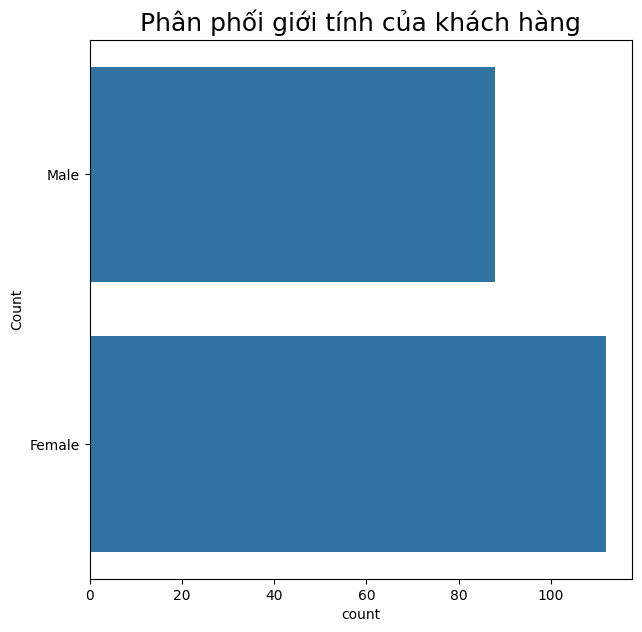

In [9]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.countplot(data['Gender'] , label ='Count')
plt.ylabel('Count')
plt.title('Phân phối giới tính của khách hàng',fontsize = 18)
plt.show()

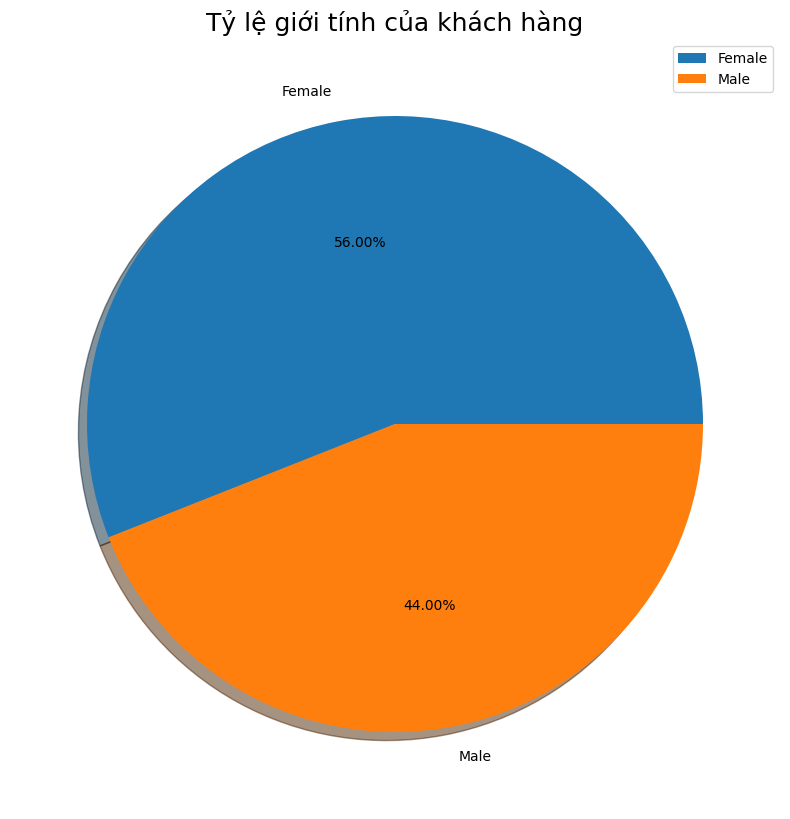

In [10]:
size = data['Gender'].value_counts().sort_index()/201 
labels = ['Female', 'Male']
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%', counterclock=True)
plt.title('Tỷ lệ giới tính của khách hàng', fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()

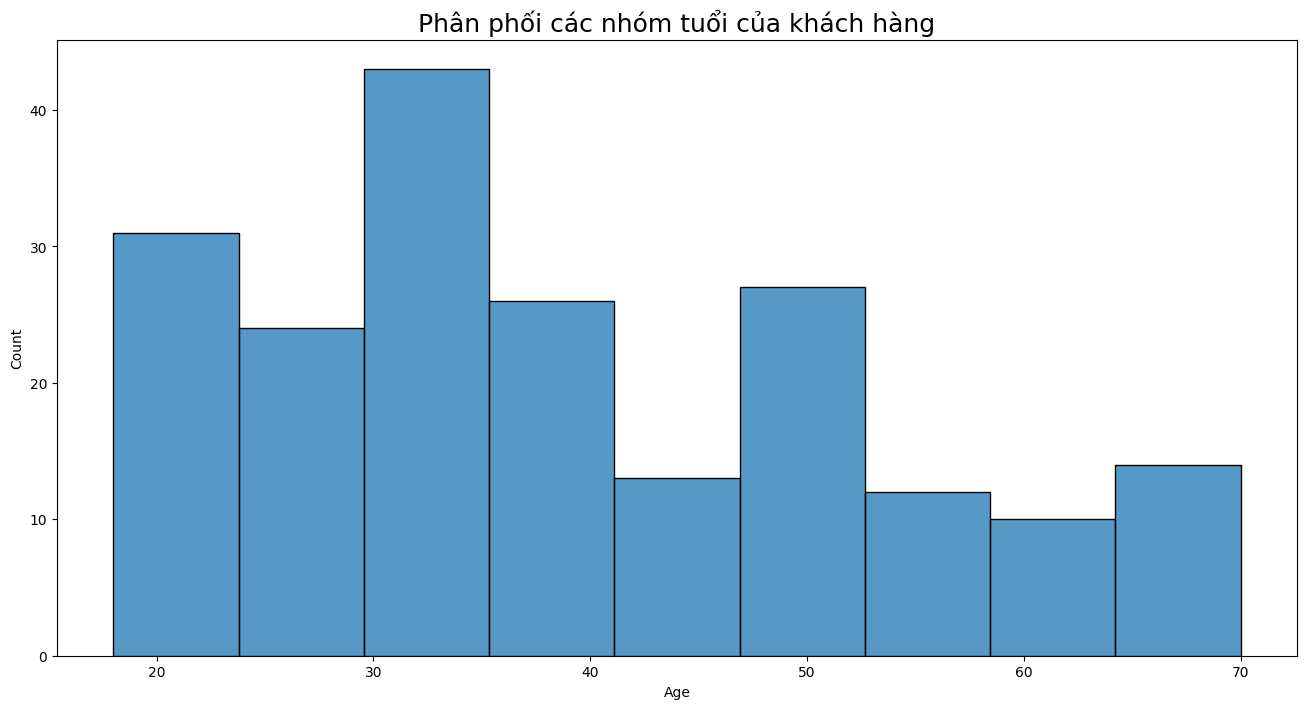

In [11]:
plt.figure(figsize=(16, 8))
sns.histplot(data['Age'])
plt.title('Phân phối các nhóm tuổi của khách hàng',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Biểu đồ thể hiện phân phối tuổi của khách hàng')

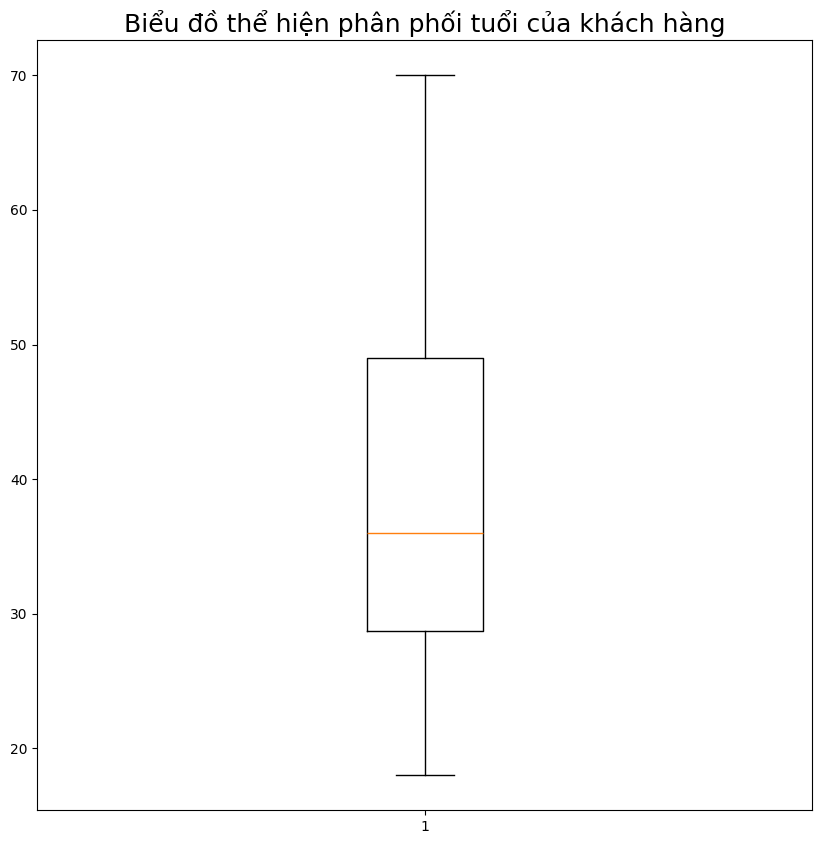

In [12]:
plt.figure(figsize=(10,10))
plt.boxplot(data['Age'])
plt.title('Biểu đồ thể hiện phân phối tuổi của khách hàng',fontsize=18 )

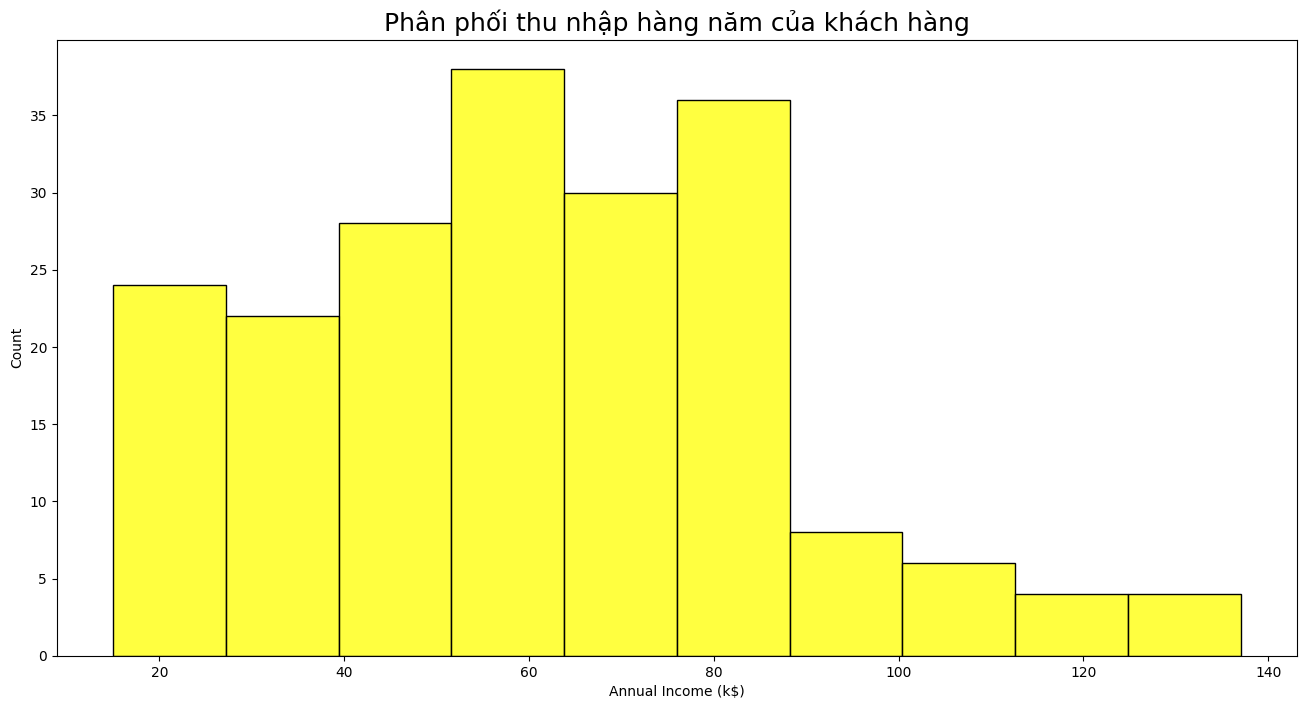

In [13]:
plt.figure(figsize=(16, 8))
sns.histplot(data['Annual Income (k$)'], color = 'yellow')
plt.title('Phân phối thu nhập hàng năm của khách hàng',fontsize=18)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2692217241.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'],


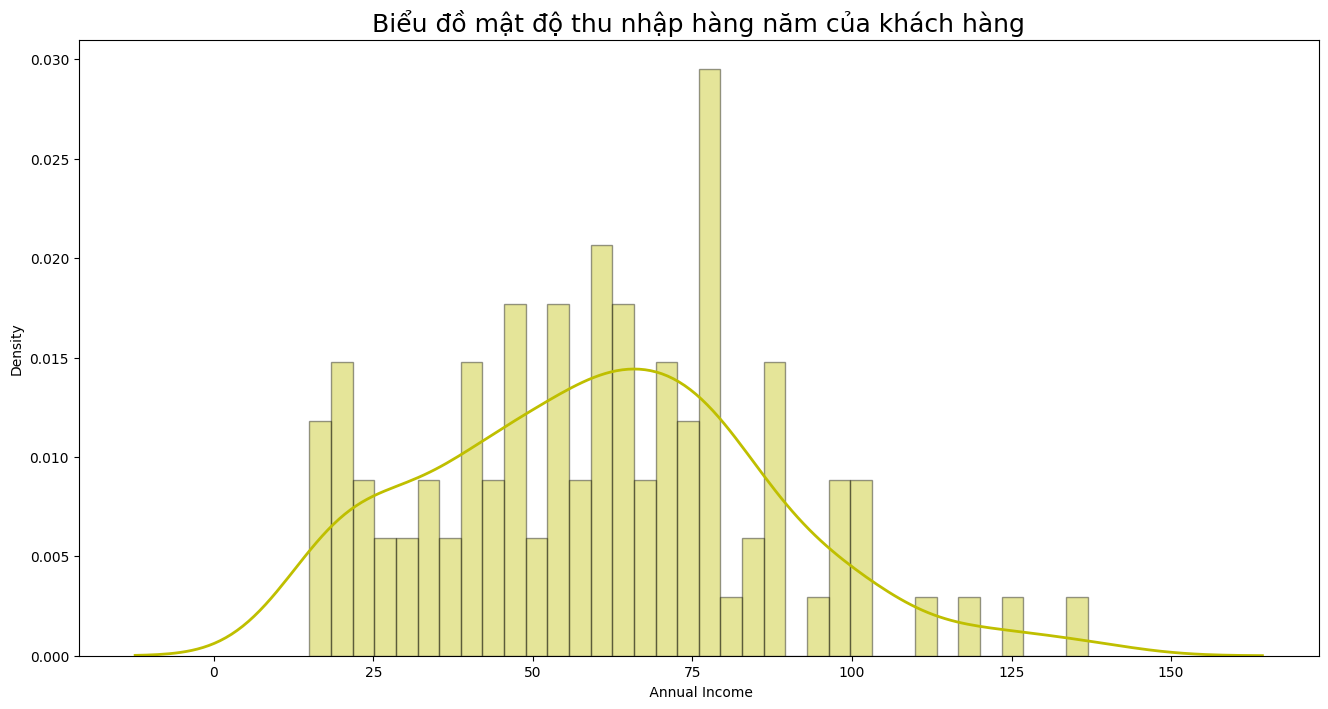

In [14]:
plt.figure(figsize=(16, 8))
sns.distplot(data['Annual Income (k$)'],
            hist = True, 
            bins=int(180/5),
            kde = True,
            color='y',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})
plt.xlabel(' Annual Income')
plt.title('Biểu đồ mật độ thu nhập hàng năm của khách hàng',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Biểu đồ thể hiện điểm chi tiêu của khách hàng')

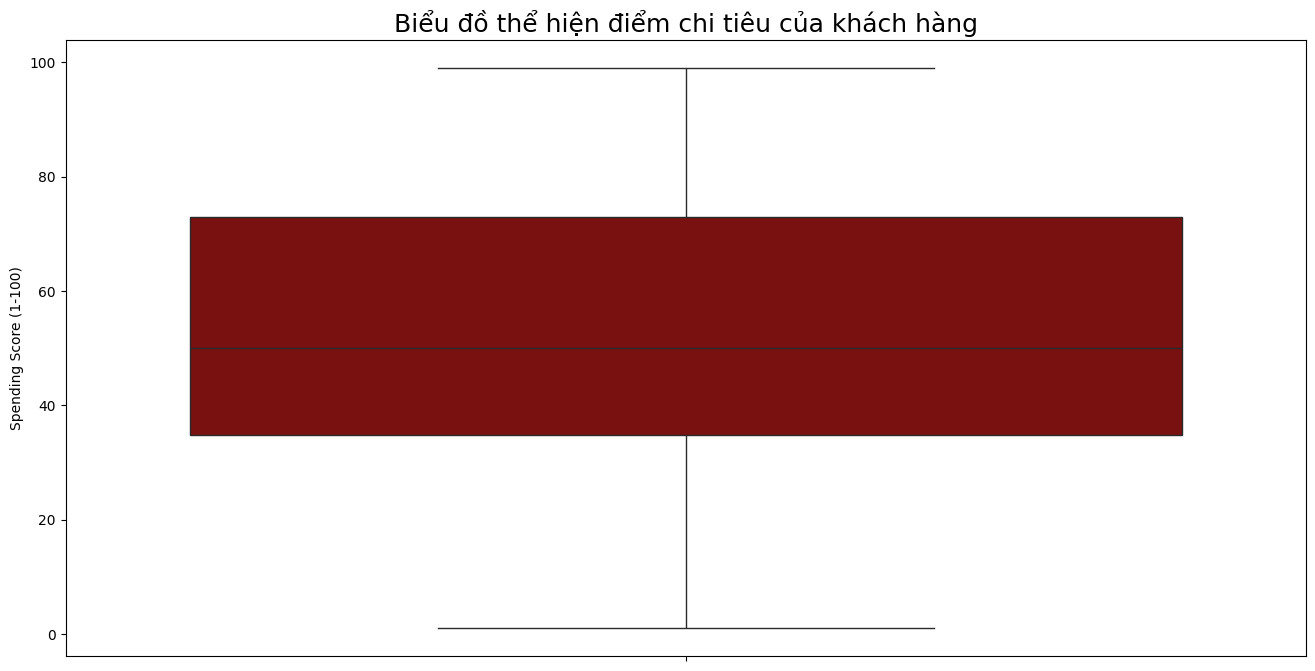

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(data['Spending Score (1-100)'], color='darkred')
plt.title('Biểu đồ thể hiện điểm chi tiêu của khách hàng',fontsize=18 )

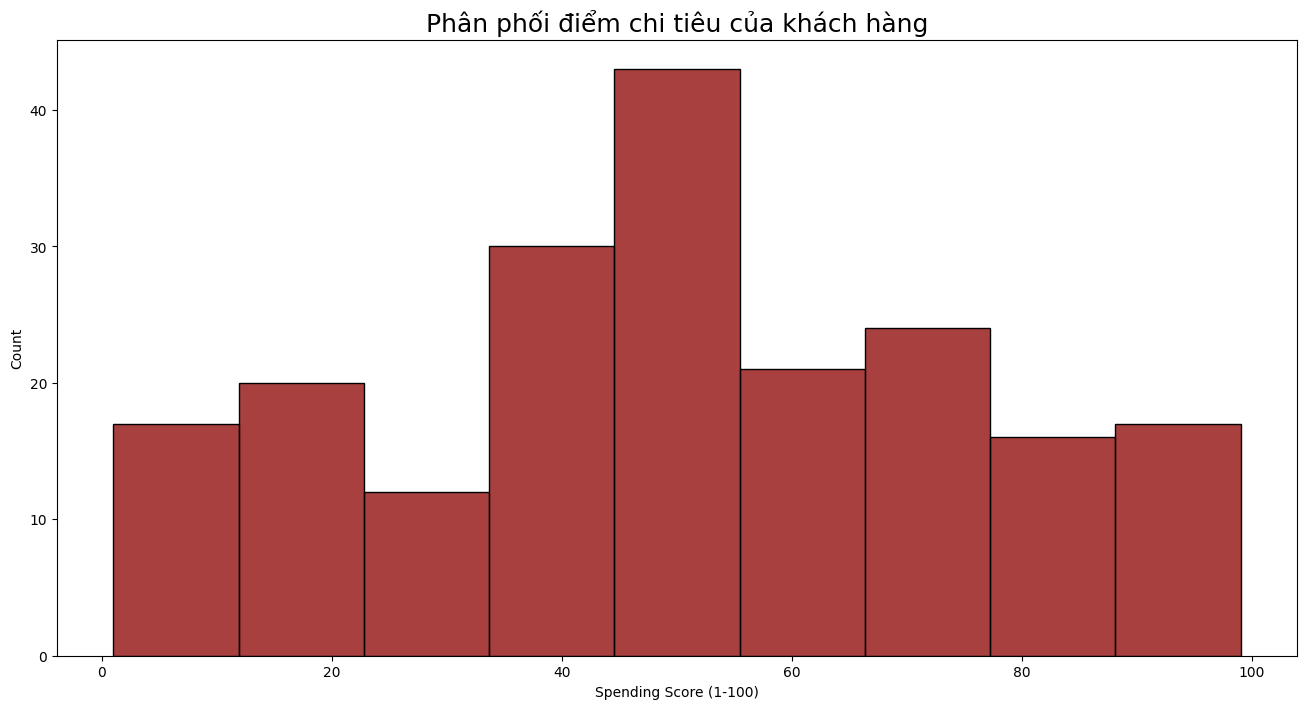

In [16]:
plt.figure(figsize=(16,8))
sns.histplot(data['Spending Score (1-100)'], color = 'darkred')
plt.title('Phân phối điểm chi tiêu của khách hàng', fontsize = 18)
plt.show()

### *CLUSTERING K-MEAN*


In [17]:
data1 = data.iloc[:,[3,4]]
data1.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
#Import mean

[]

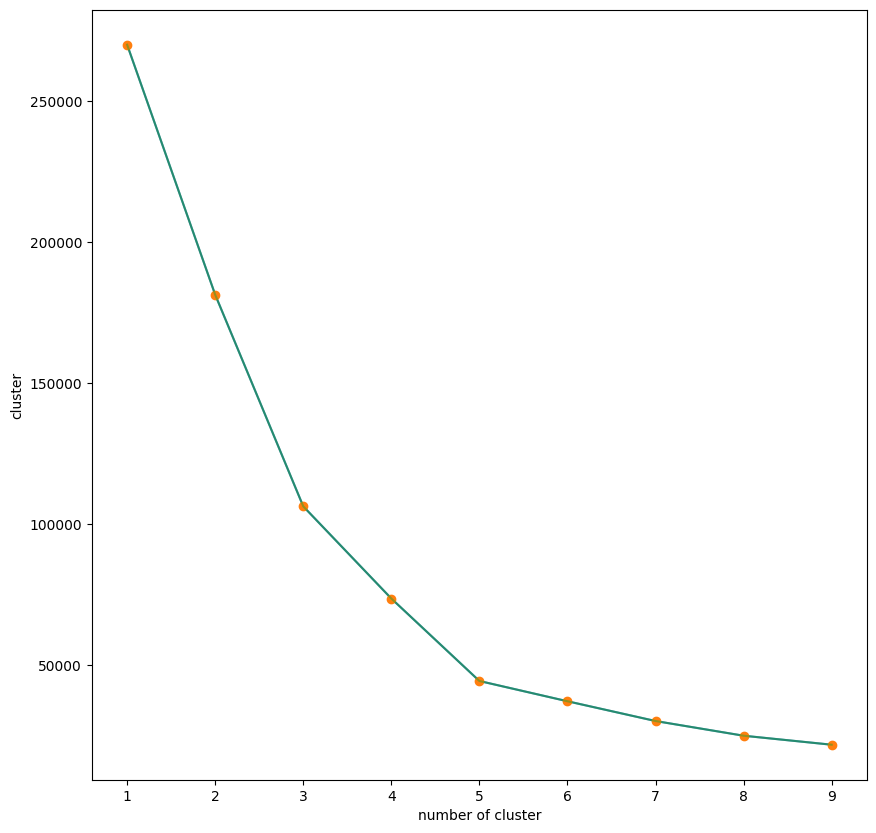

In [19]:
cluster =[]
for i in range(1, 10):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    Kmeans.fit(data1)
    cluster.append(Kmeans.inertia_)

#Visualisation
plt.plot(range(1, 10), cluster)
plt.plot(np.arange(1 , 10) , cluster , 'o')
plt.plot(np.arange(1 , 10) , cluster , '-' , alpha = 0.5)
plt.xlabel('number of cluster')
plt.ylabel('cluster')
plt.plot()

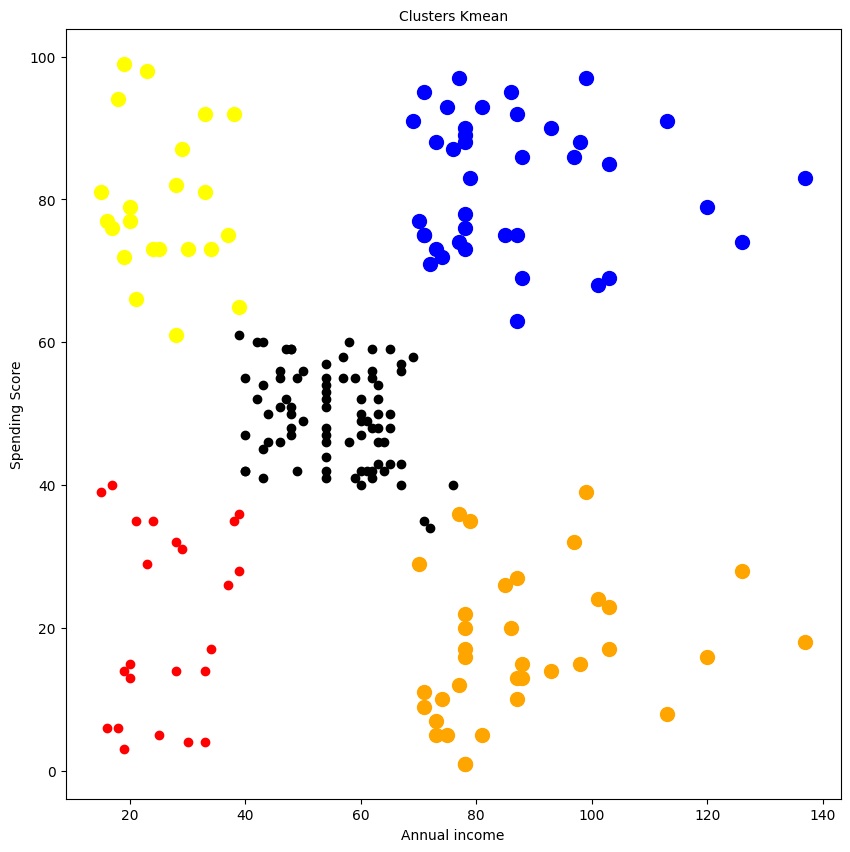

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data1)
y_mean = kmeans.fit_predict(data1)

data1 = np.array(data1)
plt.scatter(data1[y_mean ==0,0], data1[y_mean == 0,1], c='red')
plt.scatter(data1[y_mean ==1,0], data1[y_mean == 1,1], c='black')
plt.scatter(data1[y_mean ==2,0], data1[y_mean == 2,1], s=100, c='blue')
plt.scatter(data1[y_mean ==3,0], data1[y_mean == 3,1], s=100, c='orange')
plt.scatter(data1[y_mean ==4,0], data1[y_mean == 4,1], s=100, c='yellow')

plt.title("Clusters Kmean", fontsize=10)
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.show()

In [21]:
data2 = data.iloc[:,[2,4]]
data2.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


[]

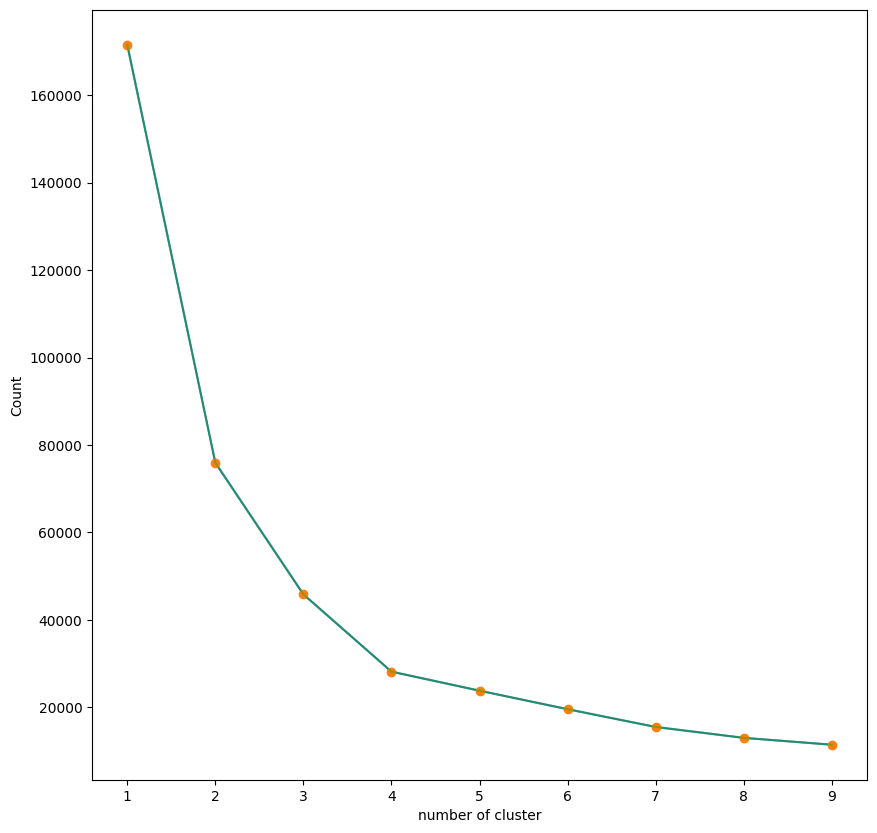

In [22]:
cluster =[]
for i in range(1, 10):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    Kmeans.fit(data2)
    cluster.append(Kmeans.inertia_)

#Visualisation
plt.plot(range(1, 10), cluster)
plt.plot(np.arange(1 , 10) , cluster , 'o')
plt.plot(np.arange(1 , 10) , cluster , '-' , alpha = 0.5)
plt.xlabel('number of cluster')
plt.ylabel('Count')
plt.plot()

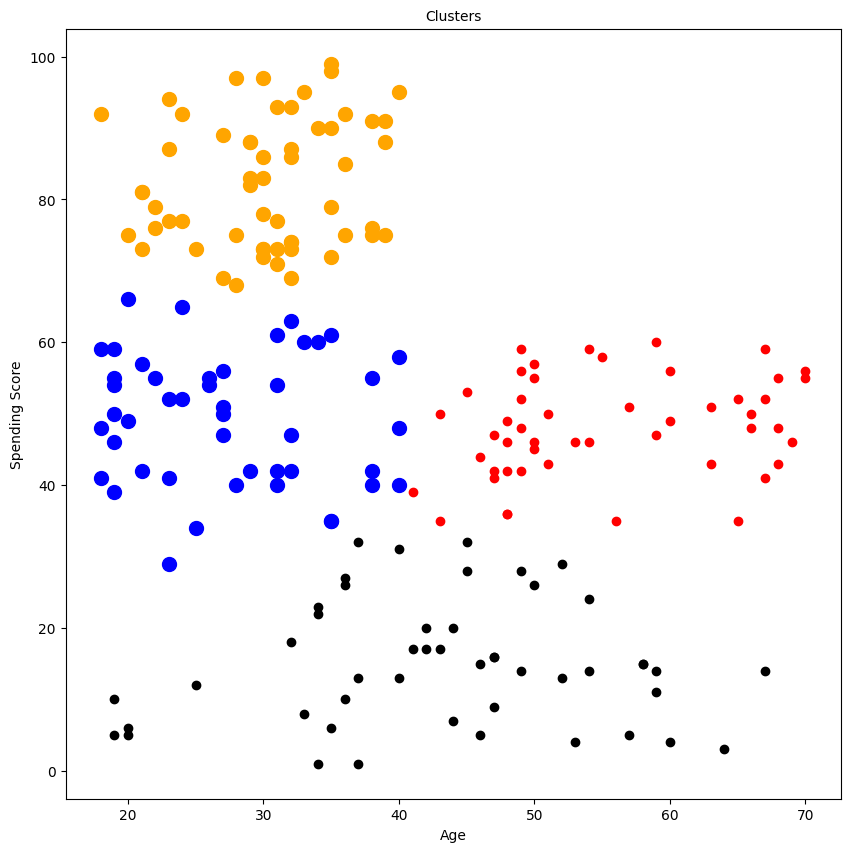

In [23]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(data2)

y_km = kmeans.fit_predict(data2)

data2 = np.array(data2)

plt.title("Clusters", fontsize=10)
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.scatter(data2[y_km ==0,0], data2[y_km == 0,1], c='red')
plt.scatter(data2[y_km ==1,0], data2[y_km == 1,1], c='black')
plt.scatter(data2[y_km ==2,0], data2[y_km == 2,1], s=100, c='blue')
plt.scatter(data2[y_km ==3,0], data2[y_km == 3,1], s=100, c='orange')